In [1]:
import cobra.test
import os
from os.path import join
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cobra.util import create_stoichiometric_matrix
import numpy as np
model = cobra.io.load_json_model(join("RehMBEL1391_sbml_L3V1.json"))

In [2]:
#
len(model.reactions)

1538

In [3]:
len(model.metabolites)

1348

In [4]:
len(model.genes)

1350

In [5]:
model.medium

{'EX_fe2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_pi_e': 100.0,
 'EX_cobalt2_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_k_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fru_e': 3.0,
 'EX_nh4_e': 10.0,
 'EX_na_e': 10.0,
 'EX_o2_e': 18.5,
 'EX_mobd_e': 10.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 100.0}

In [6]:
model

Name,RehMBEL1391
Memory address,0x022ec1eba370
Number of metabolites,1348
Number of reactions,1538
Number of groups,0
Objective expression,1.0*Biomass - 1.0*Biomass_reverse_57a34
Compartments,"c, e"


In [7]:
model.metabolites[0:10]

[<Metabolite zoe_c at 0x22ec1e84f10>,
 <Metabolite 3hbz_c at 0x22ec1e90460>,
 <Metabolite hco3_c at 0x22ec1e906a0>,
 <Metabolite actp_c at 0x22ec1e902e0>,
 <Metabolite glytrna_c at 0x22ec1e902b0>,
 <Metabolite phaccoa_c at 0x22ec1e90280>,
 <Metabolite 2h3mbzpyr_c at 0x22ec1e90250>,
 <Metabolite mettrna_c at 0x22ec1e90220>,
 <Metabolite ugmd_c at 0x22ec1e901f0>,
 <Metabolite adprib_c at 0x22ec1e901c0>]

In [8]:
#figuring out the PHA-production-pathway that is included in the provided model 
for reactions in model.metabolites.get_by_id("phb_c").reactions: 
    print(reactions, reactions.name)  

for reactions in model.metabolites.get_by_id("phb_e").reactions: 
    print(reactions, reactions.name)

PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c Poly(3-hydroxybutyrate) depolymerase
PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
PHBt: h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport
PHBt: h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport
EX_pbhb_e: phb_e -->  EX_pbhb_e


In [9]:
for reactions in model.metabolites.get_by_id("r3hbcoa_c").reactions: 
    print(reactions, reactions.name)

PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase


In [10]:
for reactions in model.metabolites.get_by_id("r3hbn2_c").reactions: 
    print(reactions, reactions.name)
#found a dead-end

PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c Poly(3-hydroxybutyrate) depolymerase


In [11]:
for reactions in model.metabolites.get_by_id("r3rhbb_c").reactions:
    print(reactions)

PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c
HBDH: h2o_c + r3rhbb_c <=> 2.0 bhb_c + h_c


In [12]:
for reactions in model.metabolites.get_by_id("b2coa_c").reactions: 
    print(reactions, reactions.name)

ACOADH1: btcoa_c + fad_c + h_c <=> b2coa_c + fadh2_c Acyl-CoA dehydrogenase butanoyl-CoA)
3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
GLUCD1: gcoa_c + nad_c --> b2coa_c + co2_c + nadh_c Glutaryl-CoA dehydrogenase
ENCOAH1: 3hbcoa_c <=> b2coa_c + h2o_c Enoyl-CoA hydratase


In [13]:
for reactions in model.metabolites.get_by_id("aacoa_c").reactions: 
    print(reactions, reactions.name)

HACD1: 3hbcoa_c + nad_c --> aacoa_c + h_c + nadh_c 3-hydroxyacyl-CoA dehydrogenase (acetoacetyl-CoA)
3HBCDH: 3hbcoa_c + nadp_c --> aacoa_c + h_c + nadph_c 3-hydroxybutyryl-CoA dehydrogenase
OCOAT1m: acac_c + succoa_c <=> aacoa_c + succ_c 3-oxoacid CoA-transferase
ACACT1r: 2.0 accoa_c <=> aacoa_c + coa_c Acetyl-CoA C-acetyltransferase
AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase
AACOAS: acac_c + atp_c + coa_c --> aacoa_c + amp_c + h_c + ppi_c Acetoacetyl-CoA synthetase


In [14]:
#to figure out the names of the IDs we printed them
print(model.metabolites.aacoa_c, ' = ', model.metabolites.aacoa_c.name)
print(model.metabolites.acac_c, ' = ', model.metabolites.acac_c.name)
print(model.metabolites.succoa_c, ' = ', model.metabolites.succoa_c.name)
print(model.metabolites.gcoa_c, ' = ',model.metabolites.gcoa_c.name)
print(model.metabolites.oaa_c, ' = ',model.metabolites.oaa_c.name)
print(model.metabolites.accoa_c, ' = ',model.metabolites.accoa_c.name)
print(model.metabolites.btcoa_c, ' = ',model.metabolites.btcoa_c.name)
print(model.metabolites.b2coa_c, ' = ',model.metabolites.b2coa_c.name)
print(model.metabolites.r3rhbb_c, ' = ',model.metabolites.r3rhbb_c.name)
print(model.metabolites.r3hbn2_c, ' = ',model.metabolites.r3hbn2_c.name)
print(model.metabolites.bhb_c, ' = ',model.metabolites.bhb_c.name)

aacoa_c  =  Acetoacetyl-CoA
acac_c  =  Acetoacetate
succoa_c  =  Succinyl-CoA
gcoa_c  =  Glutaryl-CoA
oaa_c  =  Oxaloacetate
accoa_c  =  Acetyl-CoA
btcoa_c  =  Butanoyl-CoA
b2coa_c  =  Crotonoyl-CoA
r3rhbb_c  =  (R)-3-((R)-3-Hydroxybutanoyloxy)butanoate
r3hbn2_c  =  ((R)-3-Hydroxybutanoyl)(n-2)
bhb_c  =  (R)-3-Hydroxybutanoate


In [15]:
#whenever we found a metabolite without an assigned molecular formula we added it in accordance with data found on pubchem
model.metabolites.get_by_id("3hadpcoa_c")
#change molecluar formula of 3hadpcoa_c in accordance with data found on pubchem(https://pubchem.ncbi.nlm.nih.gov/compound/3S_-3-Hydroxyadipyl-CoA) 
model.metabolites.get_by_id("3hadpcoa_c").elements = {"C": 27, "H": 44, "N": 7, "O": 20, "P":3, "S":1}

#confirm that the molecular formula was updated
print(model.metabolites.get_by_id("3hadpcoa_c").name, 'molecular formula is', model.metabolites.get_by_id("3hadpcoa_c").formula)

(3S)-3-Hydroxyadipyl-CoA molecular formula is C27H44N7O20P3S


In [59]:
#finding the names of hydroxyacyl-CoA included in the model to later create an reaction where they react to PHA 
for metabolite in model.metabolites.query('yl-CoA', 'name'):
    print(metabolite.name, '=', metabolite.id)

Phenylacetyl-CoA = phaccoa_c
2-Methylbut-2-enoyl-CoATiglyl-CoA = 2m2ecoa_c
Anthranilyl-CoA = anthcoa_c
crotonobetainyl-CoA = ctbtcoa_c
Crotonoyl-CoA = b2coa_c
Propanoyl-CoA = ppcoa_c
2-Amino-5-oxocyclohex-1-enecarbonyl-CoA = 2amoeccoa_c
3-Hydroxypropionyl-CoA = 3hpcoa_c
2-Methylprop-2-enoyl-CoA = 2mp2coa_c
O-Succinylbenzoyl-CoA = sbzcoa_c
Pimeloyl-CoA = pmcoa_c
Succinyl-CoA = succoa_c
Glutaryl-CoA = gcoa_c
5-Methyl-3-oxo-4-hexenoyl-CoA = 5m3o4hcoa_c
(2E)-5-Methylhexa-2,4-dienoyl-CoA = 2e5mhdcoa_c
Cyclohexane-1-carboxyl-CoA = cchccoa_c
Malonyl-CoA = malcoa_c
3-Oxopropionyl-CoA = 3oppcoa_c
Adipyl-CoA = adipcoa_c
2-Ketocyclohexane-1-carboxyl-CoA = 2kchccoa_c
Naphthyl-2-methyl-succinyl-CoA = napmsccoa_c
2-Hydroxycyclohexane-1-carboxyl-CoA = hcchccoa_c
3-Methylcrotonyl-CoA = 3mccoa_c
(S)-Methylmalonyl-CoA = mmcoa__S_c
5-Methylhex-4-enoyl-CoA = 5mh4ecoa_c
3-Hydroxypimeloyl-CoA = hpimcoa_c
Naphthyl-2-oxomethyl-succinyl-CoA = napomsuccoa_c
6-Hydroxycyclohex-1-enecarbonyl-CoA = 6hcecoa_c
4-Hydr

Typically, the PHA is composed of monomers that are 2n (n ≥ 0) carbons shorter than the substrates added to the media. For example, growth of P. oleovorans on octanoate (C8) generates a PHA copolymer containing C8 and C6 monomers, whereas growth on dodecanoate (C12) generates a PHA containing C12, C10, C8, and C6 monomers (Lageveen et al., 1995). Alkanoic acids present in the media are transported into the cell where they are first converted to CoA esters before being directed to the β-oxidation pathway where a number of 3-hydroxyacyl-CoA intermediates can be generated. Since the PHA synthase accepts only the R-isomer of 3-hydroxyacyl- CoA and the bacterial b-oxidation of saturated fatty acids generates only the S-isomer of 3-hydroxyacyl-CoA, bacteria must have enzymes capable of generating R-3-hydroxyacyl-CoA. One potential enzyme is a 3-hydroxyacyl-CoA epimerase, mediating the reversible conversion of the S- and R-isomers of 3-hydroxyacyl-CoA. 

https://biocyclopedia.com/index/plant_pathways/mediumchainlength_polyhydroxyalkanaote.php

In [58]:
#results for R-3-hydroxyacyl-CoAs from generated list 
#A total of 6 3-hydroxyacyl-CoAs has been found, but only 1 is available as an (R)-isomer
#potential to include epimerisation reaction, where S-epimers are converted into R-epimers
print(model.metabolites.get_by_id("3hadpcoa_c"), ' = ', model.metabolites.get_by_id("3hadpcoa_c").name)
print(model.metabolites.get_by_id("hpimcoa_c"), ' = ', model.metabolites.get_by_id("hpimcoa_c").name)
print(model.metabolites.get_by_id("3hpcoa_c"), ' = ', model.metabolites.get_by_id("3hpcoa_c").name)
print(model.metabolites.get_by_id("r3hbcoa_c"), ' = ', model.metabolites.get_by_id("r3hbcoa_c").name)
print(model.metabolites.get_by_id("3hbcoa_c"), ' = ', model.metabolites.get_by_id("3hbcoa_c").name)
print(model.metabolites.get_by_id("3hibutcoa_c"), ' = ', model.metabolites.get_by_id("3hibutcoa_c").name)

3hadpcoa_c  =  (3S)-3-Hydroxyadipyl-CoA
hpimcoa_c  =  3-Hydroxypimeloyl-CoA
3hpcoa_c  =  3-Hydroxypropionyl-CoA
r3hbcoa_c  =  (R)-3-Hydroxybutanoyl-CoA
3hbcoa_c  =  (S)-3-Hydroxybutanoyl-CoA
3hibutcoa_c  =  (S)-3-Hydroxyisobutyryl-CoA


**result:**

*S-epimers:*
- 3hadpcoa_c  =  (3S)-3-Hydroxyadipyl-CoA
- 3hbcoa_c  =  (S)-3-Hydroxybutanoyl-CoA
- 3hibutcoa_c  =  (S)-3-Hydroxyisobutyryl-CoA

*R-epimers:*
- hpimcoa_c  =  3-Hydroxypimeloyl-CoA
- 3hpcoa_c  =  3-Hydroxypropionyl-CoA
- r3hbcoa_c  =  (R)-3-Hydroxybutanoyl-CoA

In [18]:
print(model.metabolites.hpimcoa_c.elements)
#add missing molecular formula with data found on PubChem ("https://pubchem.ncbi.nlm.nih.gov/compound/9543022")
model.metabolites.get_by_id("hpimcoa_c").elements = {"C": 28, "H": 46, "N": 7, "O": 20, "P":3, "S":1}
#check
print(model.metabolites.get_by_id("hpimcoa_c").name, 'molecular formula is', model.metabolites.get_by_id("hpimcoa_c").formula)

{}
3-Hydroxypimeloyl-CoA molecular formula is C28H46N7O20P3S


In [19]:
print(model.metabolites.r3hbcoa_c.elements)
#add missing molecular formula for r3hbcoa_3
model.metabolites.r3hbcoa_c.elements = {"C": 25,"H": 42,"N": 7,"O": 18,"P": 3,"S": 1}
print('The molecular formula of', model.metabolites.get_by_id("r3hbcoa_c").name, 'is', model.metabolites.get_by_id("r3hbcoa_c").formula)

#add molecular formula for r3rhbb_c and r3hbn2_c
model.metabolites.r3rhbb_c.elements = {"C": 8, "H": 13, "O": 5}
model.metabolites.r3hbn2_c.elements = {"C": 4, "H": 6, "O": 2}
#print to check whether it was successful
print('The molecular formula of', model.metabolites.get_by_id("r3rhbb_c").name, 'is', model.metabolites.get_by_id("r3rhbb_c").formula)
print('The molecular formula of', model.metabolites.get_by_id("r3hbn2_c").name, 'is', model.metabolites.get_by_id("r3hbn2_c").formula)

{}
The molecular formula of (R)-3-Hydroxybutanoyl-CoA is C25H42N7O18P3S
The molecular formula of (R)-3-((R)-3-Hydroxybutanoyloxy)butanoate is C8H13O5
The molecular formula of ((R)-3-Hydroxybutanoyl)(n-2) is C4H6O2


In [20]:
#there is no molecular formula for phb
model.metabolites.get_by_id("phb_e").elements

{}

In addition to the short-chain-length PHA, PHB, production already present in the model, we added pathways for 5 medium-chain-length PHAs, namely Polyhydroxyhexanoate (PHHx), Polyhydroxyheptanoate (PHH), Polyhydroxyoctanoate (PHHO), Polyhydroxynonaoate (PHN) and Polyhydroxydecanoate (PHD).

In [21]:
#check which metabolite-ids are already taken that could resemble PHA-names
for metabolite in model.metabolites.query('phhx_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phh_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phho_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phn_c', 'name'):
    print(metabolite)
for metabolite in model.metabolites.query('phd_c', 'name'):
    print(metabolite)
#nothing got printed meaning none of the names have been used before in the model.

In [22]:
#creating metabolites, giving them a unique ID according to the abbreviation of their full name
PHHx = Metabolite(id="phhx_c", compartment ="c", name ="Polyhydroxyhexanoate")
PHH = Metabolite(id="phh_c", compartment = "c", name ="Polyhydroxyheptanoate")
PHHO = Metabolite(id="phho_c", compartment ="c", name ="Polyhydroxyoctanoate")
PHN = Metabolite(id="phn_c", compartment = "c", name ="Polyhydroxynonaoate")
PHD = Metabolite(id="phd_c", compartment = "c", name ="Polyhydroxydecanoate")

PHHx_E = Metabolite(id="phhx_e", compartment ="e", name ="Polyhydroxyhexanoate")
PHH_E = Metabolite(id="phh_e", compartment = "e", name ="Polyhydroxyheptanoate")
PHHO_E = Metabolite(id="phho_e", compartment ="e", name ="Polyhydroxyoctanoate")
PHN_E = Metabolite(id="phn_e", compartment = "e", name ="Polyhydroxynonaoate")
PHD_E = Metabolite(id="phd_e", compartment = "e", name ="Polyhydroxydecanoate")

Reaction for PHA transport: 

(generally, PHA gets accumulated intracellularly as granules, but for the sake of improvement of flux we assume that the PHA gets excreted)

**PHA(c) + H+(c) --> PHA(e) + H+(e)**

in accordance with the transport already included in the model:
h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport

In [23]:
for reactions in model.metabolites.get_by_id('phb_c').reactions: 
    print(reactions, reactions.name)

PHBD: h2o_c + phb_c <=> h_c + r3hbn2_c + r3rhbb_c Poly(3-hydroxybutyrate) depolymerase
PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
PHBt: h_c + phb_c --> h_e + phb_e Poly-beta-hydroxybutyrate transport


In [24]:
#creating new reactions to model the production of medium-chain-length PHAs from (R)-3-Hydroxybutanoyl-CoA
mcl_PHA_model = model.copy()
phaC_PHHx_r3hbcoa_c = Reaction("phaC_PHHx_r3hbcoa_c")
phaC_PHHx_r3hbcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_r3hbcoa_c'
#phaC_PHHx_r3hbcoa_c.lower_bound = -1000
phaC_PHH_r3hbcoa_c = Reaction('phaC_PHH_r3hbcoa_c')
phaC_PHH_r3hbcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHH_from_r3hbcoa_c'
#phaC_PHH_r3hbcoa_c.lower_bound = -1000
phaC_PHHO_r3hbcoa_c = Reaction('phaC_PHHO_r3hbcoa_c')
phaC_PHHO_r3hbcoa_c.name = "mcl_Polyhydroxyalkanoate_synthase_for_PHHO_from_r3hbcoa_c"
#phaC_PHHO_r3hbcoa_c.lower_bound = -1000
phaC_PHN_r3hbcoa_c = Reaction('phaC_PHN_r3hbcoa_c')
phaC_PHN_r3hbcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_r3hbcoa_c'
#phaC_PHN_r3hbcoa_c.lower_bound = -1000
phaC_PHD_r3hbcoa_c = Reaction('phaC_PHD_r3hbcoa_c')
phaC_PHD_r3hbcoa_c.name = "mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_r3hbcoa_c"
#phaC_PHD_r3hbcoa_c.lower_bound = -1000

From KEGG ENZYME:2.3.1.304 (https://www.genome.jp/entry/2.3.1.304) 

reaction equation:
(3R)-3-hydroxyacyl-CoA + poly[(R)-3-hydroxyalkanoate]n = CoA + poly[(R)-3-hydroxyalkanoate]n+1

for easier handling in this model we assume:

**hydroxyacyl-CoA = CoA + polyhydroxyalkanoate**

In [25]:
#adding stochiometric data and involved metabolites to new reactions to model to produce medium-chain-length PHA from (R)-3-Hydroxybutanoyl-CoA
phaC_PHHx_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHHx: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1})
phaC_PHH_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1, })
phaC_PHHO_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHHO: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1, })
phaC_PHN_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: -1,
                                PHD: 1,
                                   mcl_PHA_model.metabolites.coa_c: 1,})

In [26]:
#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hbcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hbcoa_c])

In [27]:
mcl_PHA_model.reactions.get_by_id("phaC_PHHx_r3hbcoa_c")

Reaction identifier,phaC_PHHx_r3hbcoa_c
Name,mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_r3hbcoa_c
Memory address,0x022ec3089a90
Stoichiometry,r3hbcoa_c --> coa_c + phhx_c (R)-3-Hydroxybutanoyl-CoA --> Coenzyme A + Polyhydroxyhexanoate
GPR,
Lower bound,0.0
Upper bound,1000.0


In [28]:
#it works 
#doing the same for the other 3-Hydroxyacetyl-CoAs

#creating new reaction to model to produce medium-chain-length PHA from 3-Hydroxypimeloyl-CoA
phaC_PHHx_hpimcoa_c = Reaction('phaC_PHHx_hpimcoa_c')
phaC_PHHx_hpimcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase for PHHx from hpimcoa_c'
#phaC_PHHx_hpimcoa_c.lower_bound = -1000
phaC_PHH_hpimcoa_c = Reaction('phaC_PHH_hpimcoa_c')
phaC_PHH_hpimcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase for PHH from hpimcoa_c'
#phaC_PHH_hpimcoa_c.lower_bound = -1000
phaC_PHHO_hpimcoa_c = Reaction('phaC_PHHO_hpimcoa_c')
phaC_PHHO_hpimcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase for PHHO from hpimcoa_c'
#phaC_PHHO_hpimcoa_c.lower_bound = -1000
phaC_PHN_hpimcoa_c = Reaction('phaC_PHN_hpimcoa_c')
phaC_PHN_hpimcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase for PHN from hpimcoa_c'
#phaC_PHN_hpimcoa_c.lower_bound = -1000
phaC_PHD_hpimcoa_c = Reaction('phaC_PHD_hpimcoa_c')
phaC_PHD_hpimcoa_c.name = "mcl_Polyhydroxyalkanoate_synthase for PHD from hpimcoa_c"
#phaC_PHD_hpimcoa_c.lower_bound = -1000

#adding stochiometric data and involved metabolites to new reactions to model the production of medium-chain-length PHA from 3-Hydroxypimeloyl-CoA
phaC_PHHx_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_hpimcoa_c.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_hpimcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_hpimcoa_c])

In [29]:
#it works 
#doing the same for 3-Hydroxypropionyl

#creating new reaction to model to produce medium-chain-length PHA from 3-Hydroxypropionyl-CoA
phaC_PHHx_3hpcoa_c = Reaction('phaC_PHHx_3hpcoa_c')
phaC_PHHx_3hpcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_3hpcoa_c'
#phaC_PHHx_3hpcoa_c.lower_bound = -1000
phaC_PHH_3hpcoa_c = Reaction('phaC_PHH_3hpcoa_c')
phaC_PHH_3hpcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHH_from_3hpcoa_c'
#phaC_PHH_3hpcoa_c.lower_bound = -1000
phaC_PHHO_3hpcoa_c = Reaction('phaC_PHHO_3hpcoa_c')
phaC_PHHO_3hpcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHHO_from_3hpcoa_c'
#phaC_PHHO_3hpcoa_c.lower_bound = -1000
phaC_PHN_3hpcoa_c = Reaction('phaC_PHN_3hpcoa_c')
phaC_PHN_3hpcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHN_from_3hpcoa_c'
#phaC_PHN_3hpcoa_c.lower_bound = -1000
phaC_PHD_3hpcoa_c = Reaction('phaC_PHD_3hpcoa_c')
phaC_PHD_3hpcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase_for_PHD_from_3hpcoa_c'
#phaC_PHD_3hpcoa_c.lower_bound = -1000

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from 3-Hydroxypropionyl-CoA
phaC_PHHx_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_3hpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_3hpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_3hpcoa_c])

In [30]:
#check whether addition was successful
for reactions in mcl_PHA_model.metabolites.get_by_id("phhx_c").reactions:
    print(reactions, reactions.name)

phaC_PHHx_r3hbcoa_c: r3hbcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_r3hbcoa_c
phaC_PHHx_3hpcoa_c: 3hpcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_3hpcoa_c
phaC_PHHx_hpimcoa_c: hpimcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase for PHHx from hpimcoa_c


In [31]:
for reactions in model.metabolites.get_by_id("hpimcoa_c").reactions:
    print(reactions, reactions.name)

ACDH6: 6checoa_c + h2o_c --> hpimcoa_c Acyl dehydratase


In [32]:
#model.reactions.get_by_id("phaC_PHHx_r3hbcoa_c")
mcl_PHA_model.metabolites.r3hbcoa_c.reactions

frozenset({<Reaction 3HBCD at 0x22ec3304970>,
           <Reaction AACOAR at 0x22ec3822af0>,
           <Reaction PHAS at 0x22ec34fafa0>,
           <Reaction phaC_PHD_r3hbcoa_c at 0x22ec4ab8bb0>,
           <Reaction phaC_PHHO_r3hbcoa_c at 0x22ec3089ac0>,
           <Reaction phaC_PHH_r3hbcoa_c at 0x22ec3089c10>,
           <Reaction phaC_PHHx_r3hbcoa_c at 0x22ec3089a90>,
           <Reaction phaC_PHN_r3hbcoa_c at 0x22ec3089be0>})

In [33]:
for reactions in model.metabolites.r3hbcoa_c.reactions: 
    print(reactions, reactions.name)

PHAS: r3hbcoa_c <=> coa_c + phb_c Polyhydroxyalkanoate synthase
3HBCD: r3hbcoa_c <=> b2coa_c + h2o_c 3-hydroxybutyryl-CoA dehydratase
AACOAR: nadp_c + r3hbcoa_c <=> aacoa_c + h_c + nadph_c Acetoacetyl-CoA reductase


In [34]:
for reactions in mcl_PHA_model.metabolites.phhx_c.reactions: 
    print(reactions, reactions.name)

phaC_PHHx_r3hbcoa_c: r3hbcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_r3hbcoa_c
phaC_PHHx_3hpcoa_c: 3hpcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase_for_PHHx_from_3hpcoa_c
phaC_PHHx_hpimcoa_c: hpimcoa_c --> coa_c + phhx_c mcl_Polyhydroxyalkanoate_synthase for PHHx from hpimcoa_c


In [35]:
#creation of R-epimers of S-hydroxybutanoyl-CoA, S-3-Hydroxybutyryl-CoA and (3S)-3-Hydroxyadipyl-CoA
#ID is similar to S-epimer with addition of r
#this time we also know molecular formula (addition of elements as dict does not work, but copy-pasting of formula from model.metabolites.ID-data does)
R3_HADP_COA = Metabolite(id="r3hadpcoa_c", compartment ="c", name ="(3R)-R-Hydroxyadipyl-CoA", formula = 'C27H44N7O20P3S')
#R-epimer of butanoyl-CoA is already existing, does not need to be created and epimerisation reaction as well
#R3_HB_COA = Metabolite(id="r3hbcoa_c", compartment = "c", name ="(R)-3-Hydroxybutanoyl-CoA", formula = 'C25H38N7O18P3S')
R3_HIBUT_COA = Metabolite(id="r3hibutcoa_c", compartment ="c", name ="(R)-3-Hydroxyisobutyryl-CoA", formula = 'C25H38N7O18P3S')

epimerase_3hadpcoa_c = Reaction('Epimerisation_of_S-Hydroxyadipyl-CoA')
epimerase_3hadpcoa_c.name = "Epimerisation of S-Hydroxyadipyl-CoA"
#epimerase_3hbcoa_c = Reaction('Epimerisation_of_S-Hydroxybutanoyl-CoA')
epimerase_3hibutcoa_c = Reaction('Epimerisation_of_S-Hydroxyisobutyryl-CoA')
epimerase_3hibutcoa_c.name = 'Epimerisation of S-Hydroxyisobutyryl-CoA'

#adding stochiometric data and involved metabolites to new reactions to model the epimerisation
epimerase_3hadpcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hadpcoa_c"): -1,
                                mcl_PHA_model.metabolites.r3hbcoa_c: 1,})
#epimerase_3hbcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hbcoa_c"): -1,
#                                R3_HB_COA: 1,})
epimerase_3hibutcoa_c.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hibutcoa_c"): -1,
                                R3_HIBUT_COA: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([epimerase_3hadpcoa_c])
#mcl_PHA_model.add_reactions([epimerase_3hbcoa_c])
mcl_PHA_model.add_reactions([epimerase_3hibutcoa_c])

In [36]:
#add PHA production from newly created R-Hydroxyacyl-CoAs as well to model

In [37]:
#creating new reaction to model to produce medium-chain-length PHA from (3R)-R-Hydroxyadipyl-CoA
phaC_PHHx_r3hadpcoa_c = Reaction('phaC_PHHx_r3hadpcoa_c')
phaC_PHHx_r3hadpcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_(3R)-R-Hydroxyadipyl-CoA'
#phaC_PHHx_r3hadpcoa_c.lower_bound = -1000
phaC_PHH_r3hadpcoa_c = Reaction('phaC_PHH_r3hadpcoa_c')
phaC_PHH_r3hadpcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(3R)-R-Hydroxyadipyl-CoA'
#phaC_PHH_r3hadpcoa_c.lower_bound = -1000
phaC_PHHO_r3hadpcoa_c = Reaction('phaC_PHHO_r3hadpcoa_c')
phaC_PHHO_r3hadpcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(3R)-R-Hydroxyadipyl-CoA'
#phaC_PHHO_r3hadpcoa_c.lower_bound = -1000
phaC_PHN_r3hadpcoa_c = Reaction('phaC_PHN_r3hadpcoa_c')
phaC_PHN_r3hadpcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(3R)-R-Hydroxyadipyl-CoA'
#phaC_PHN_r3hadpcoa_c.lower_bound = -1000
phaC_PHD_r3hadpcoa_c = Reaction('phaC_PHD_r3hadpcoa_c')
phaC_PHD_r3hadpcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(3R)-R-Hydroxyadipyl-CoA'
#phaC_PHD_r3hadpcoa_c.lower_bound = -1000

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (3R)-R-Hydroxyadipyl-CoA
phaC_PHHx_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hadpcoa_c.add_metabolites({R3_HADP_COA: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})


#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hadpcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hadpcoa_c])

In [38]:
#creating new reaction to model to produce medium-chain-length PHA from (R)-3-Hydroxyisobutyryl-CoA
phaC_PHHx_r3hibutcoa_c = Reaction('phaC_PHHx_r3hibutcoa_c')
phaC_PHHx_r3hibutcoa_c.name = 'mcl_Polyhydroxyalkanoate_synthase for PHHx from (R)_3_Hydroxyisobutyryl_CoA'
#phaC_PHHx_r3hibutcoa_c.lower_bound = -1000
phaC_PHH_r3hibutcoa_c = Reaction('phaC_PHH_r3hibutcoa_c')
phaC_PHH_r3hibutcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(R)-3-Hydroxyisobutyryl-CoA'
#phaC_PHH_r3hibutcoa_c.lower_bound = -1000
phaC_PHHO_r3hibutcoa_c = Reaction('phaC_PHHO_r3hibutcoa_c')
phaC_PHHO_r3hibutcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(R)-3-Hydroxyisobutyryl-CoA'
#phaC_PHHO_r3hibutcoa_c.lower_bound = -1000
phaC_PHN_r3hibutcoa_c = Reaction('phaC_PHN_r3hibutcoa_c')
phaC_PHN_r3hibutcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(R)-3-Hydroxyisobutyryl-CoA'
#phaC_PHN_r3hibutcoa_c.lower_bound = -1000
phaC_PHD_r3hibutcoa_c = Reaction('phaC_PHD_r3hibutcoa_c')
phaC_PHD_r3hibutcoa_c.name = 'mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(R)-3-Hydroxyisobutyryl-CoA'
#phaC_PHD_r3hibutcoa_c.lower_bound = -1000

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (R)-3-Hydroxyisobutyryl-CoA
phaC_PHHx_r3hibutcoa_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHHx: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHH_r3hibutcoa_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHH: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHHO_r3hibutcoa_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHHO: 1, 
                                    mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHN_r3hibutcoa_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHN: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})
phaC_PHD_r3hibutcoa_c.add_metabolites({R3_HIBUT_COA: -1,
                                PHD: 1, 
                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phaC_PHHx_r3hibutcoa_c])
mcl_PHA_model.add_reactions([phaC_PHH_r3hibutcoa_c])
mcl_PHA_model.add_reactions([phaC_PHHO_r3hibutcoa_c])
mcl_PHA_model.add_reactions([phaC_PHN_r3hibutcoa_c])
mcl_PHA_model.add_reactions([phaC_PHD_r3hibutcoa_c])

In [39]:
mcl_PHA_model

Name,RehMBEL1391
Memory address,0x022ec3089b20
Number of metabolites,1355
Number of reactions,1565
Number of groups,0
Objective expression,1.0*Biomass - 1.0*Biomass_reverse_57a34
Compartments,"c, e"


In [40]:
#why did the reactions also get added to the original model?
model

Name,RehMBEL1391
Memory address,0x022ec1eba370
Number of metabolites,1348
Number of reactions,1538
Number of groups,0
Objective expression,1.0*Biomass - 1.0*Biomass_reverse_57a34
Compartments,"c, e"


In [41]:
#adding the exchange reaction to move the PHA outside of the cytosol

#exchange for polyhydroxyhexanoate (phhx)
phhx_exchange = Reaction("phhx_exchange")
#phhx_exchange.lower_bound = -1000

#exchange for polyhydroxyheptanoate (phh)
phh_exchange = Reaction("phh_exchange")
#phh_exchange.lower_bound = -1000

#exchange for polyhydroxyoctanoate (phho)
phho_exchange = Reaction("phho_exchange")
#phho_exchange.lower_bound = -1000

#exchange for polyhydroxynonanoate (phn)
phn_exchange = Reaction("phn_exchange")
#phn_exchange.lower_bound = -1000

#exchange for polyhydroxydecanoate (phd)
phd_exchange = Reaction("phd_exchange")
#phd_exchange.lower_bound = -1000

#adding stochiometric data and involved metabolites to move PHA from the inside of the cell to the outside (Polyhydroxyalkanoate transport)
phhx_exchange.add_metabolites({mcl_PHA_model.metabolites.h_c: -1,
                                PHHx: -1,
                                   mcl_PHA_model.metabolites.h_e: 1,
                                    PHHx_E: 1,})

phh_exchange.add_metabolites({mcl_PHA_model.metabolites.h_c: -1,
                                PHH: -1,
                                   mcl_PHA_model.metabolites.h_e: 1,
                                    PHH_E: 1,})

phho_exchange.add_metabolites({mcl_PHA_model.metabolites.h_c: -1,
                                PHHO: -1,
                                   mcl_PHA_model.metabolites.h_e: 1,
                                    PHHO_E: 1,})

phn_exchange.add_metabolites({mcl_PHA_model.metabolites.h_c: -1,
                                PHN: -1,
                                   mcl_PHA_model.metabolites.h_e: 1,
                                    PHN_E: 1,})

phd_exchange.add_metabolites({mcl_PHA_model.metabolites.h_c: -1,
                                PHD: -1,
                                   mcl_PHA_model.metabolites.h_e: 1,
                                    PHD_E: 1,})

#adding the reactions to the model
mcl_PHA_model.add_reactions([phhx_exchange])
mcl_PHA_model.add_reactions([phh_exchange])
mcl_PHA_model.add_reactions([phho_exchange])
mcl_PHA_model.add_reactions([phn_exchange])
mcl_PHA_model.add_reactions([phd_exchange])

In [42]:
#create exchange reactions
mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.get_by_id('phhx_e'), type="exchange")
mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.get_by_id('phh_e'), type="exchange")
mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.get_by_id('phho_e'), type="exchange")
mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.get_by_id('phd_e'), type="exchange")
mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.get_by_id('phn_e'), type="exchange")

Reaction identifier,EX_phn_e
Name,Polyhydroxynonaoate exchange
Memory address,0x022ec4b27790
Stoichiometry,phn_e <=> Polyhydroxynonaoate <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [57]:
#### improve flux towards the newly added polyhydroxyhexanoate
medium = mcl_PHA_model.medium
medium ['EX_fru_e'] = 10
mcl_PHA_model.medium = medium
print(medium)

mcl_PHA_model.objective = mcl_PHA_model.reactions.EX_phho_e
phb_production_fru = mcl_PHA_model.optimize().objective_value
print("Max. pha production [mmol gDW^-1 h^-1]:", phb_production_fru)
print("Theoretical max. yield [mmol-pha / mmol-fru]:", phb_production_fru / (-1*mcl_PHA_model.reactions.EX_fru_e.flux))

#the maximal pha production for each of the added mcl-PHAs is equal, and 18.29 mml gDW^-1 h^-1
#the theoretical max. yield mmol phb/mmol fru is 1.829 

{'EX_fe2_e': 10.0, 'EX_mg2_e': 10.0, 'EX_pi_e': 100.0, 'EX_cobalt2_e': 10.0, 'EX_cl_e': 10.0, 'EX_k_e': 10.0, 'EX_fe3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fru_e': 10, 'EX_nh4_e': 10.0, 'EX_na_e': 10.0, 'EX_o2_e': 18.5, 'EX_mobd_e': 10.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 100.0, 'EX_phhx_e': 1000.0, 'EX_phh_e': 1000.0, 'EX_phho_e': 1000.0, 'EX_phd_e': 1000.0, 'EX_phn_e': 1000.0}
Max. phb production [mmol gDW^-1 h^-1]: 18.297872340425542
Theoretical max. yield [mmol-phb / mmol-fru]: 1.8297872340425543


In [44]:
S = create_stoichiometric_matrix(model)

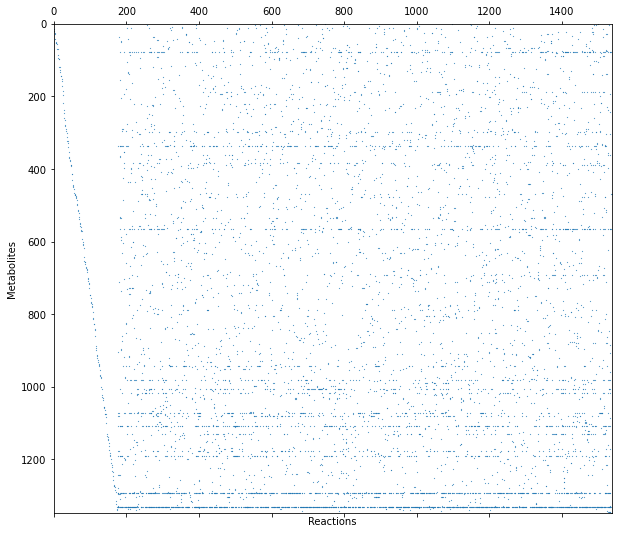

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.spy(S, precision=0.01, markersize=0.2)
plt.xlabel('Reactions')
plt.ylabel('Metabolites')
plt.show()

In [46]:
S_bin = np.where(S!=0., 1., 0.)

In [47]:
A_x = S_bin.dot(S_bin.T)

In [48]:
connectivities = A_x.diagonal()

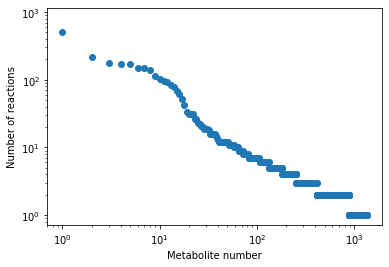

In [49]:
plt.loglog(sorted(connectivities, reverse=True), 'o')
plt.xlabel('Metabolite number')
plt.ylabel('Number of reactions')
plt.show()

In [50]:
connectivity = sorted(zip(model.metabolites, A_x.diagonal()), key=lambda item: item[1], reverse=True)
connectivity[0:10]

[(<Metabolite h_c at 0x22ec22fac70>, 834.0),
 (<Metabolite h2o_c at 0x22ec22fa580>, 508.0),
 (<Metabolite atp_c at 0x22ec22e7250>, 215.0),
 (<Metabolite nad_c at 0x22ec2050d90>, 179.0),
 (<Metabolite nadh_c at 0x22ec22a0a60>, 174.0),
 (<Metabolite pi_c at 0x22ec2b12ee0>, 173.0),
 (<Metabolite o2_c at 0x22ec22dcb50>, 148.0),
 (<Metabolite adp_c at 0x22ec22f0220>, 148.0),
 (<Metabolite h_e at 0x22ec22faca0>, 140.0),
 (<Metabolite co2_c at 0x22ec22d2e20>, 114.0)]

In [51]:
solution = model.optimize()
fluxes = solution.fluxes
order = fluxes.sort_values()
print(order.index[0:10])

Index(['H2Ot', 'EX_h_e', 'EX_pi_e', 'CO2t', 'EX_o2_e', 'EX_nh4_e', 'EX_fru_e',
       'PGI', 'PGK', 'PGM'],
      dtype='object')


In [52]:
#creating new reaction to model to produce medium-chain-length PHA from (R)-3-Hydroxybutanoyl-CoA
#phaC_PHHx_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHx_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHH_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHH_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHHO_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHHO_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHN_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHN_from_(R)-3-Hydroxybutanoyl-CoA')
#phaC_PHD_r3hbcoa_c = Reaction('mcl-Polyhydroxyalkanoate-synthase_for_PHD_from_(R)-3-Hydroxybutanoyl-CoA')

#creating new reactions to model the production of (R)-3-Hydroxybutanoyl-CoA from medium-chain-length PHA 
#phaC_r3hbcoa_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the production of mcl-PHAs from (R)-3-Hydroxybutanoyl-CoA
#phaC_PHHx_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHHx: 1, 
#                                    mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHH_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHH: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHHO_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHHO: 1, 
#                                    mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHN_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHN: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})
#phaC_PHD_r3hbcoa_c.add_metabolites({R3_HB_COA: -1,
#                                PHD: 1, 
#                                   mcl_PHA_model.metabolites.coa_c: 1,})

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (R)-3-Hydroxybutanoyl-CoA
#phaC_r3hbcoa_c_PHHx.add_metabolites({R3_HB_COA: 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHH.add_metabolites({R3_HB_COA: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHHO.add_metabolites({R3_HB_COA: 1,
#                                PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHN.add_metabolites({R3_HB_COA: 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHD.add_metabolites({R3_HB_COA: 1,
#                                PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#
#adding the reactions to the model
#mcl_PHA_model.add_reactions([phaC_PHHx_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHH_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHHO_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHN_r3hbcoa_c])
#mcl_PHA_model.add_reactions([phaC_PHD_r3hbcoa_c])
#
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHD])

In [53]:
#############################################################################################################
######################## OBSOLETE CODE ######################################################################
#
#creating new reactions to model the production of (R)-3-Hydroxybutanoyl-CoA from medium-chain-length PHA 
#phaC_r3hbcoa_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#phaC_r3hbcoa_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxybutanoyl-CoA')
#
#adding other direction of reactions as well
#phaC_r3hbcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
#                                PHHx: -1,
#                                   mcl_PHA_model.metabolites.coa_c: -1})
#phaC_r3hbcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1, })
#phaC_r3hbcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
#                                PHHO: -1,
#                                   mcl_PHA_model.metabolites.coa_c: -1, })
#phaC_r3hbcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hbcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.r3hbcoa_c: 1,
#                                PHD: -1,
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_r3hbcoa_c_PHD])

#never forget to set boundaries for newly added reactions
#somehow never added for the other reactions? 
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phhx_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phh_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phho_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phn_c, type="demand")
#mcl_PHA_model.add_boundary(mcl_PHA_model.metabolites.phd_c, type="demand")



#creating new reactions to model the production of 3-Hydroxypimeloyl-CoA from medium-chain-length PHA 
#phaC_hpimcoa_c_PHHx = Reaction('PHHx_breakdown_to_3-Hydroxypimeloyl-CoA')
#phaC_hpimcoa_c_PHH = Reaction('PHH_breakdown_to_3-Hydroxypimeloyl-CoA')
#phaC_hpimcoa_c_PHHO = Reaction('PHHO_breakdown_to_3-Hydroxypimeloyl-CoA')
#phaC_hpimcoa_c_PHN = Reaction('PHN_breakdown_to_3-Hydroxypimeloyl-CoA')
#phaC_hpimcoa_c_PHD = Reaction('PHD_breakdown_to_3-Hydroxypimeloyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to 3-Hydroxypimeloyl-CoA
#phaC_hpimcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_hpimcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_hpimcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
#                                PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_hpimcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_hpimcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.hpimcoa_c: 1,
#                               PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})


#mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_hpimcoa_c_PHD])

#mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_r3hadpcoa_c_PHD])



#creating new reactions to model the production of 3-Hydroxypropionyl-CoA from medium-chain-length PHA 
#phaC_3hpcoa_c_PHHx = Reaction('PHHx_breakdown_to_3-Hydroxypropionyl-CoA')
#phaC_3hpcoa_c_PHH = Reaction('PHH_breakdown_to_3-Hydroxypropionyl-CoA')
#phaC_3hpcoa_c_PHHO = Reaction('PHHO_breakdown_to_3-Hydroxypropionyl-CoA')
#phaC_3hpcoa_c_PHN = Reaction('PHN_breakdown_to_3-Hydroxypropionyl-CoA')
#phaC_3hpcoa_c_PHD = Reaction('PHD_breakdown_to_3-Hydroxypropionyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to 3-Hydroxypropionyl-CoA
#phaC_3hpcoa_c_PHHx.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_3hpcoa_c_PHH.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_3hpcoa_c_PHHO.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
#                                PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_3hpcoa_c_PHN.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_3hpcoa_c_PHD.add_metabolites({mcl_PHA_model.metabolites.get_by_id("3hpcoa_c"): 1,
#                                PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})

#mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHH])
#mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHN])
#mcl_PHA_model.add_reactions([phaC_3hpcoa_c_PHD])


#creating new reactions to model the production of (3R)-R-Hydroxyadipyl-CoA from medium-chain-length PHA 
#phaC_r3hadpcoa_c_PHHx = Reaction('PHHx_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
#phaC_r3hadpcoa_c_PHH = Reaction('PHH_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
#phaC_r3hadpcoa_c_PHHO = Reaction('PHHO_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
#phaC_r3hadpcoa_c_PHN = Reaction('PHN_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')
#phaC_r3hadpcoa_c_PHD = Reaction('PHD_breakdown_to_(3R)-R-Hydroxyadipyl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (3R)-R-Hydroxyadipyl-CoA
#phaC_r3hadpcoa_c_PHHx.add_metabolites({R3_HADP_COA: 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hadpcoa_c_PHH.add_metabolites({R3_HADP_COA: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hadpcoa_c_PHHO.add_metabolites({R3_HADP_COA: 1,
#                                PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hadpcoa_c_PHN.add_metabolites({R3_HADP_COA: 1,
#                                PHN: -1, 
#                                  mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hadpcoa_c_PHD.add_metabolites({R3_HADP_COA: 1,
#                                PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})

In [54]:
#creating new reactions to model the production of (R)-3-Hydroxyisobutyryl-CoA from medium-chain-length PHA 
#phaC_r3hibutcoa_c_c_PHHx = Reaction('PHHx_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
#phaC_r3hibutcoa_c_c_PHH = Reaction('PHH_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
#phaC_r3hibutcoa_c_c_PHHO = Reaction('PHHO_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
#phaC_r3hibutcoa_c_c_PHN = Reaction('PHN_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')
#phaC_r3hibutcoa_c_c_PHD = Reaction('PHD_breakdown_to_(R)-3-Hydroxyisobutyryl-CoA')

#adding stochiometric data and involved metabolites to new reactions to model the break-down of medium-chain-length PHA to (R)-3-Hydroxyisobutyryl-CoA
#phaC_r3hibutcoa_c_c_PHHx.add_metabolites({R3_HIBUT_COA: 1,
#                                PHHx: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hibutcoa_c_c_PHH.add_metabolites({R3_HIBUT_COA: 1,
#                                PHH: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hibutcoa_c_c_PHHO.add_metabolites({R3_HIBUT_COA: 1,
#                               PHHO: -1, 
#                                    mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hibutcoa_c_c_PHN.add_metabolites({R3_HIBUT_COA: 1,
#                                PHN: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})
#phaC_r3hibutcoa_c_c_PHD.add_metabolites({R3_HIBUT_COA: 1,
#                                PHD: -1, 
#                                   mcl_PHA_model.metabolites.coa_c: -1,})

#mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHHx])
#mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHH])
#mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHHO])
#mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHN])
#mcl_PHA_model.add_reactions([phaC_r3hibutcoa_c_c_PHD])